# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
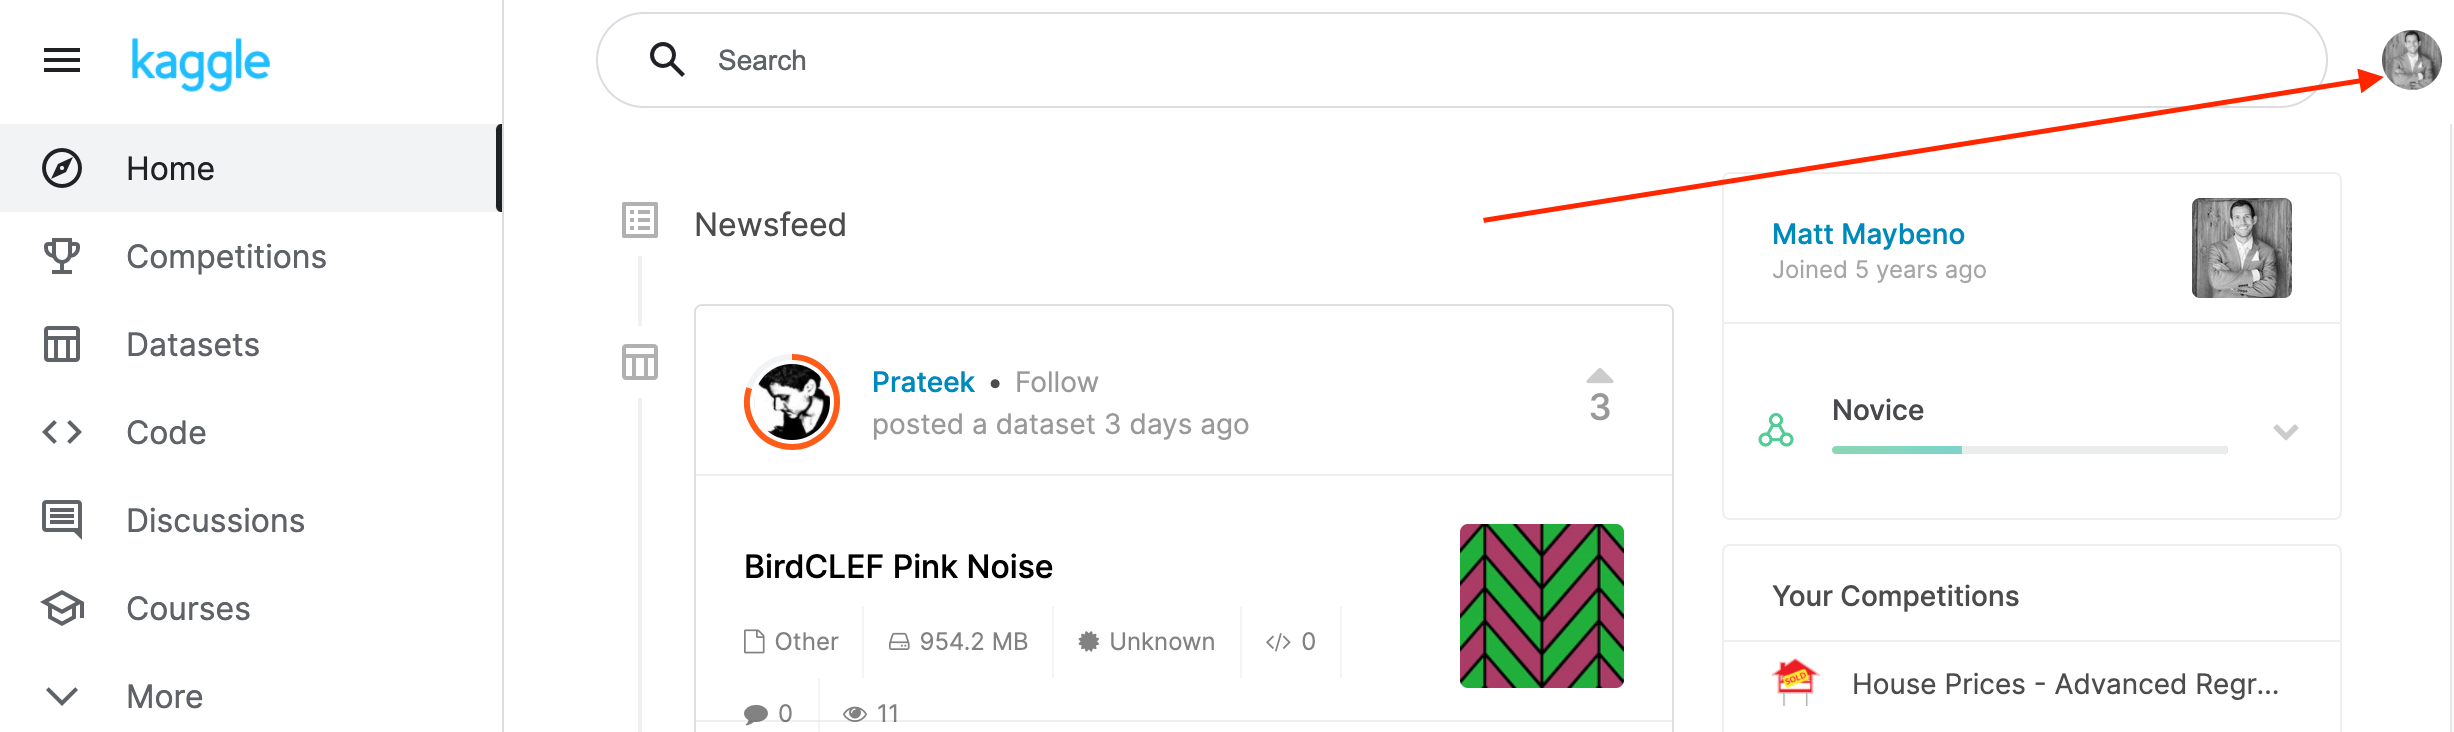
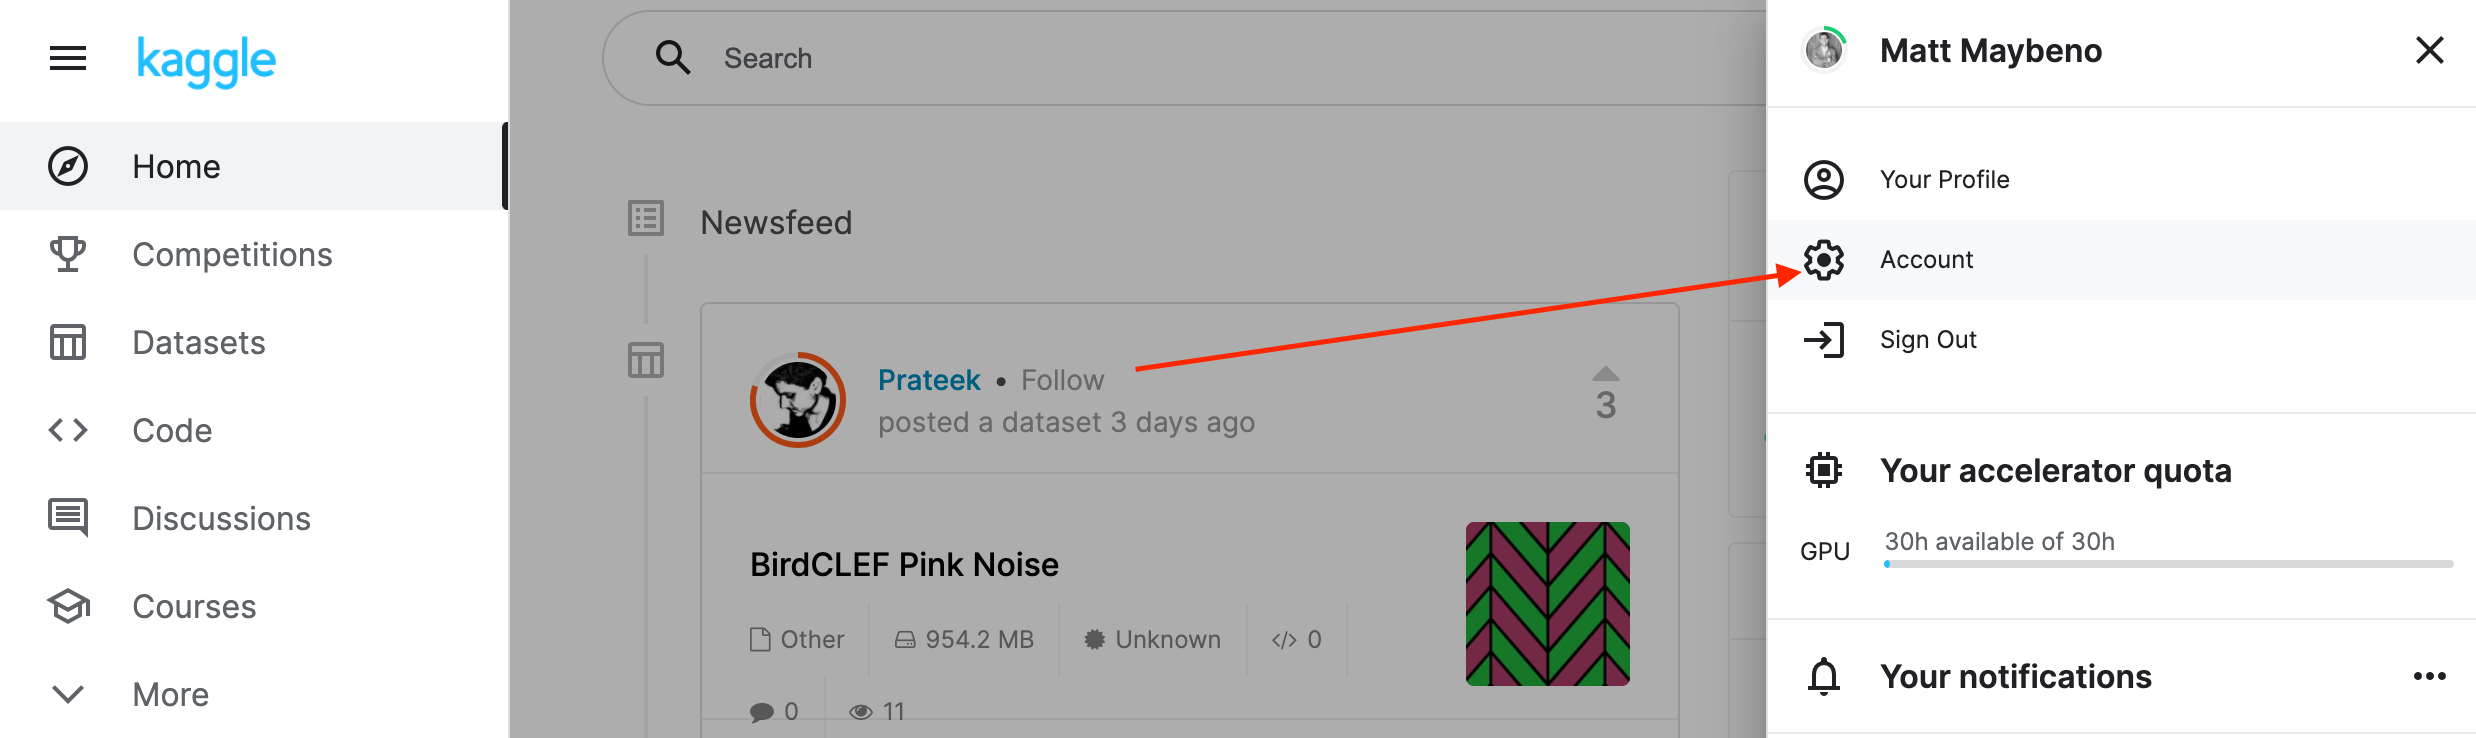
2. Scroll down to API and click Create New API Token.
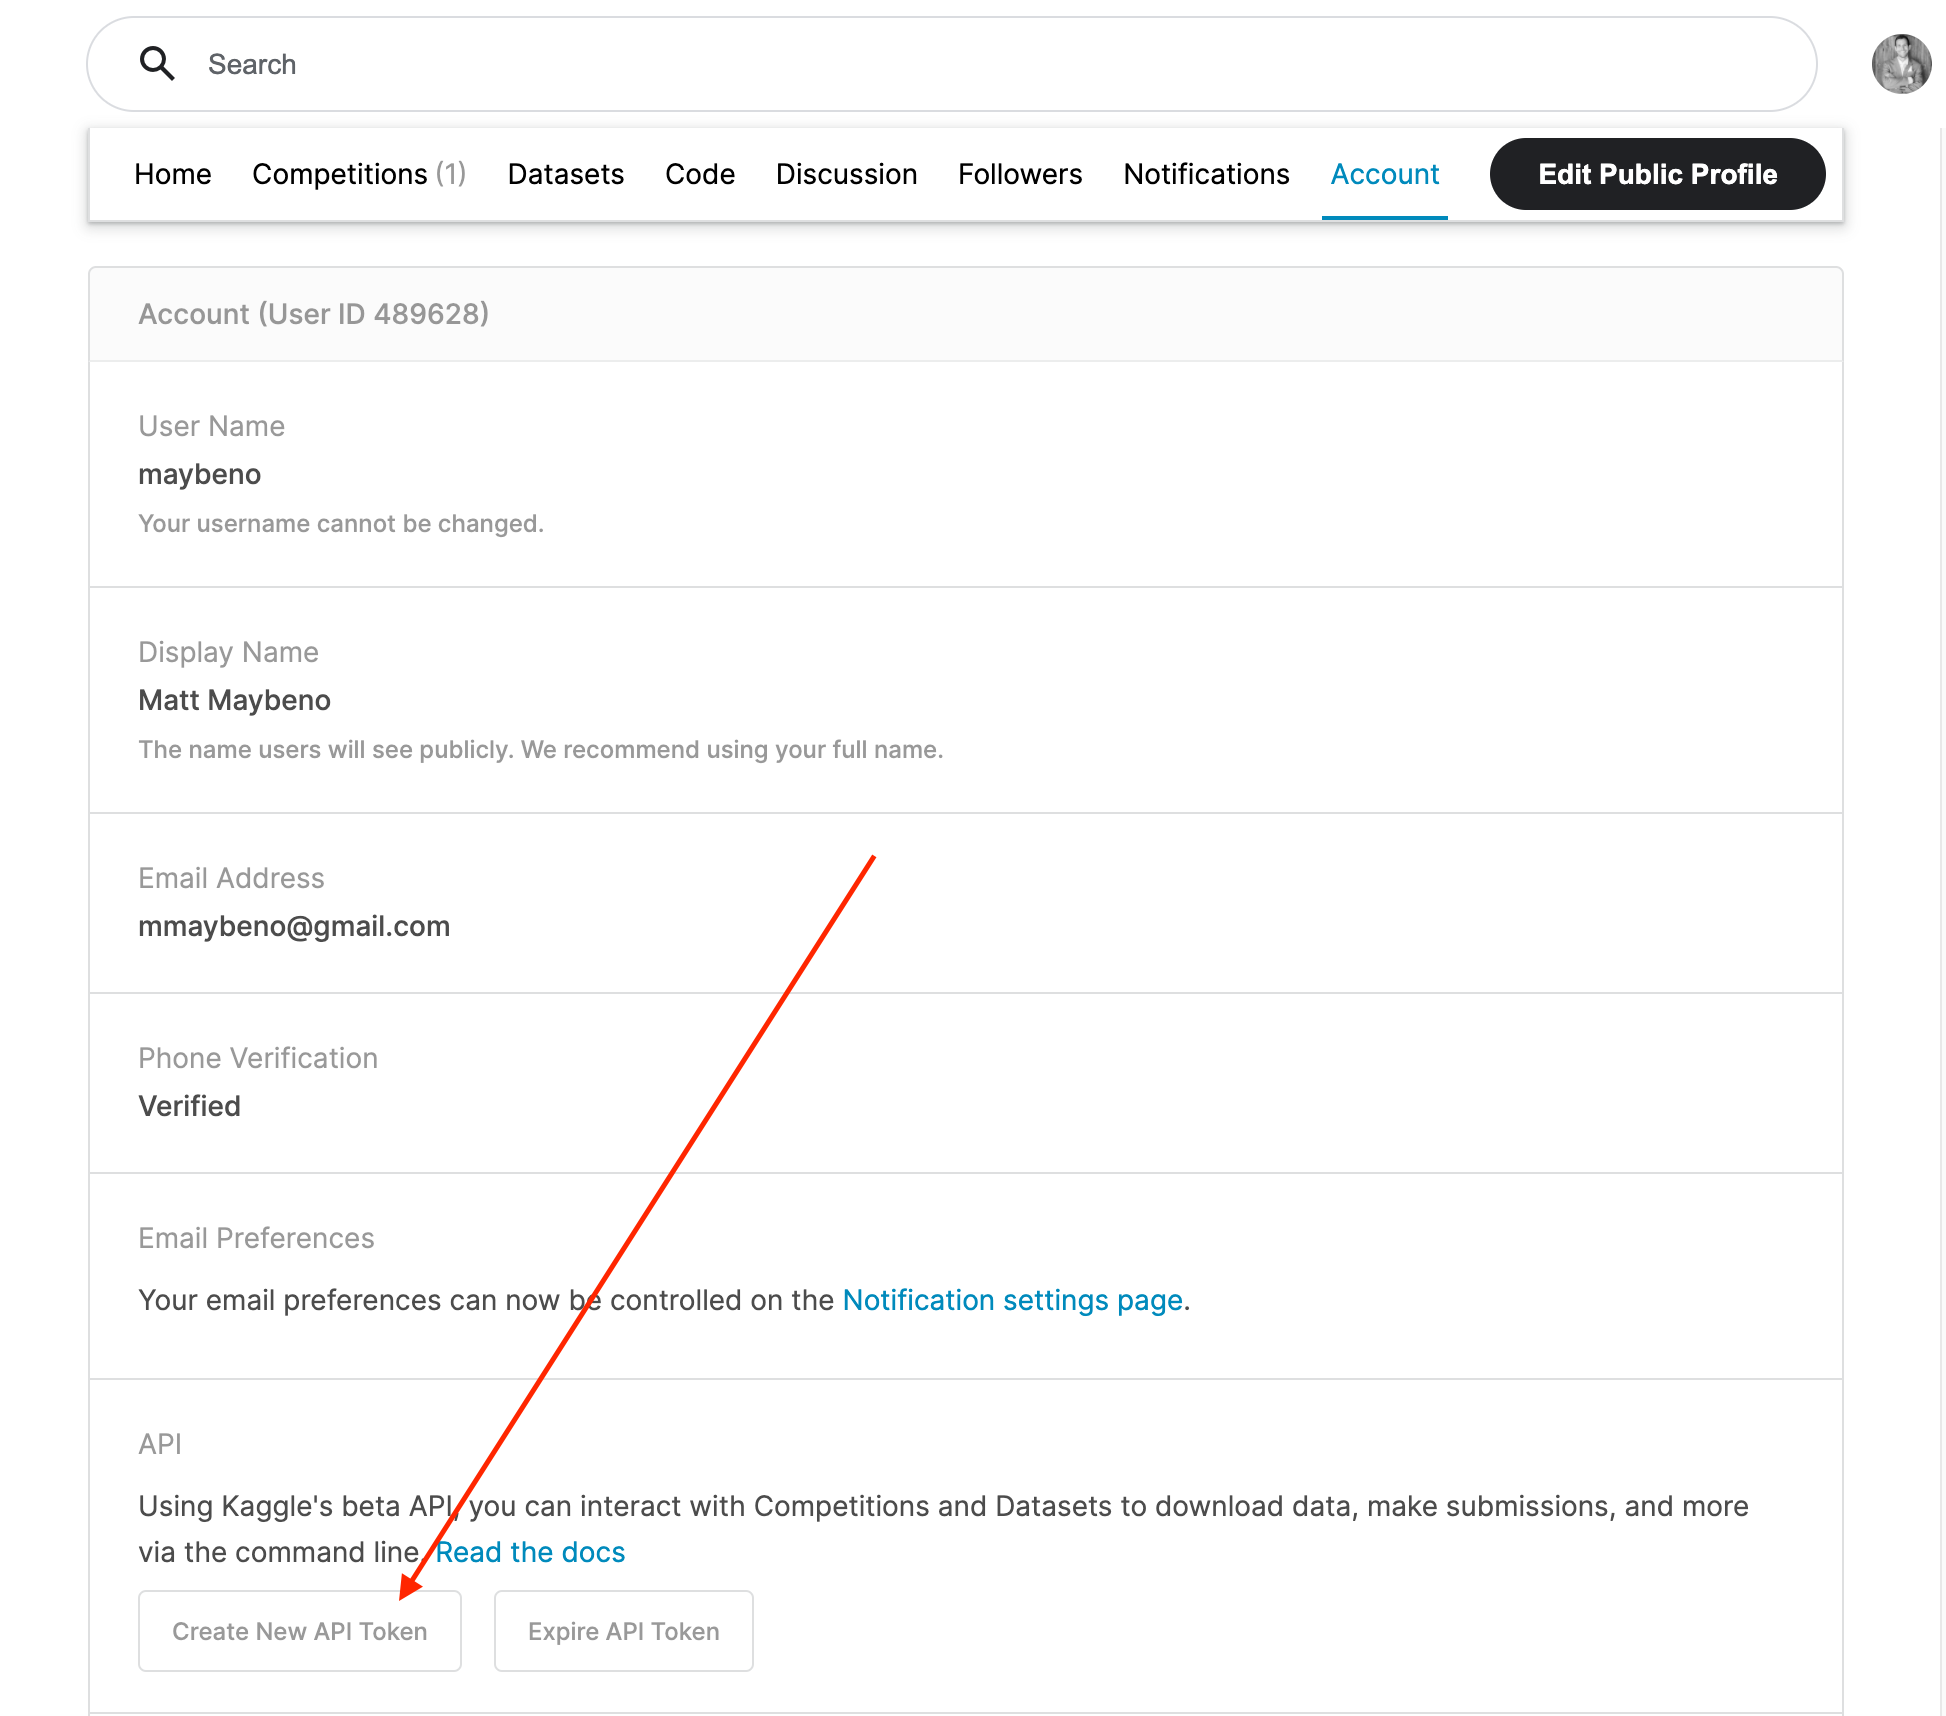
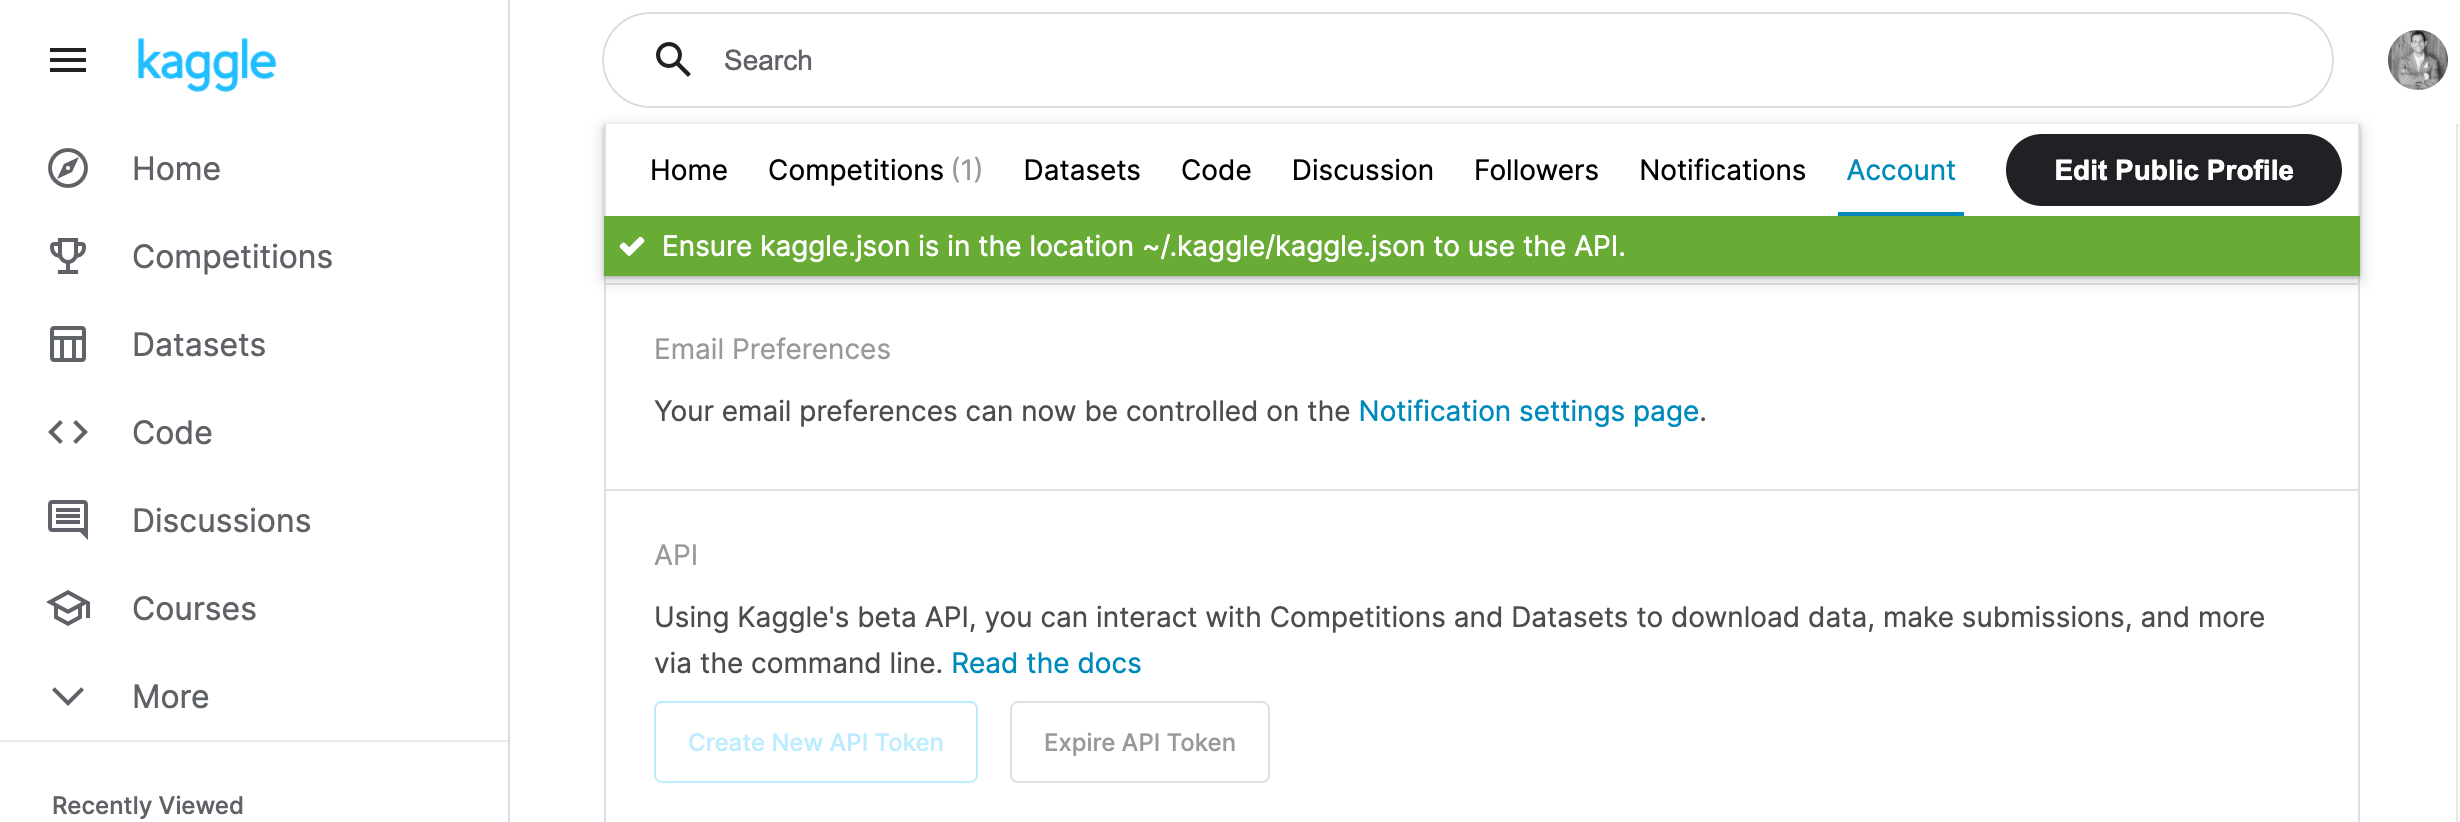
3. Open up `kaggle.json` and use the username and key.
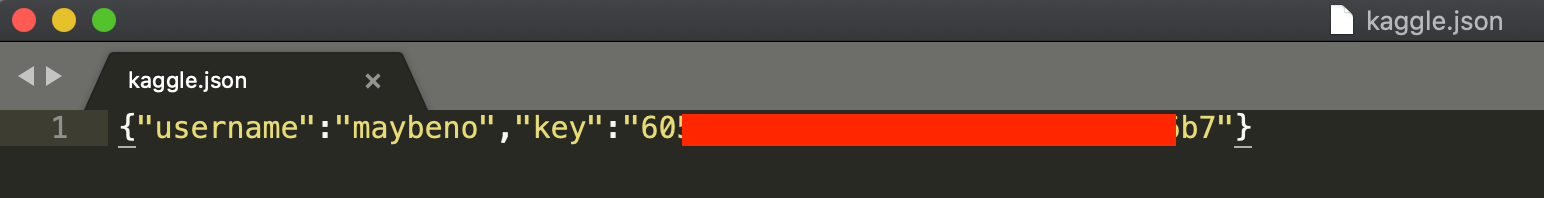

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "setuptools<60.9" wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached pip-22.0.4-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_

### Setup Kaggle API Key

In [3]:
!pip install kaggle

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-6.1.1-py2.py3-none-any.whl (9.1 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "maricruzserpa"
kaggle_key = "0c33d80b9e7a475b9ffdc691a7baecdc"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
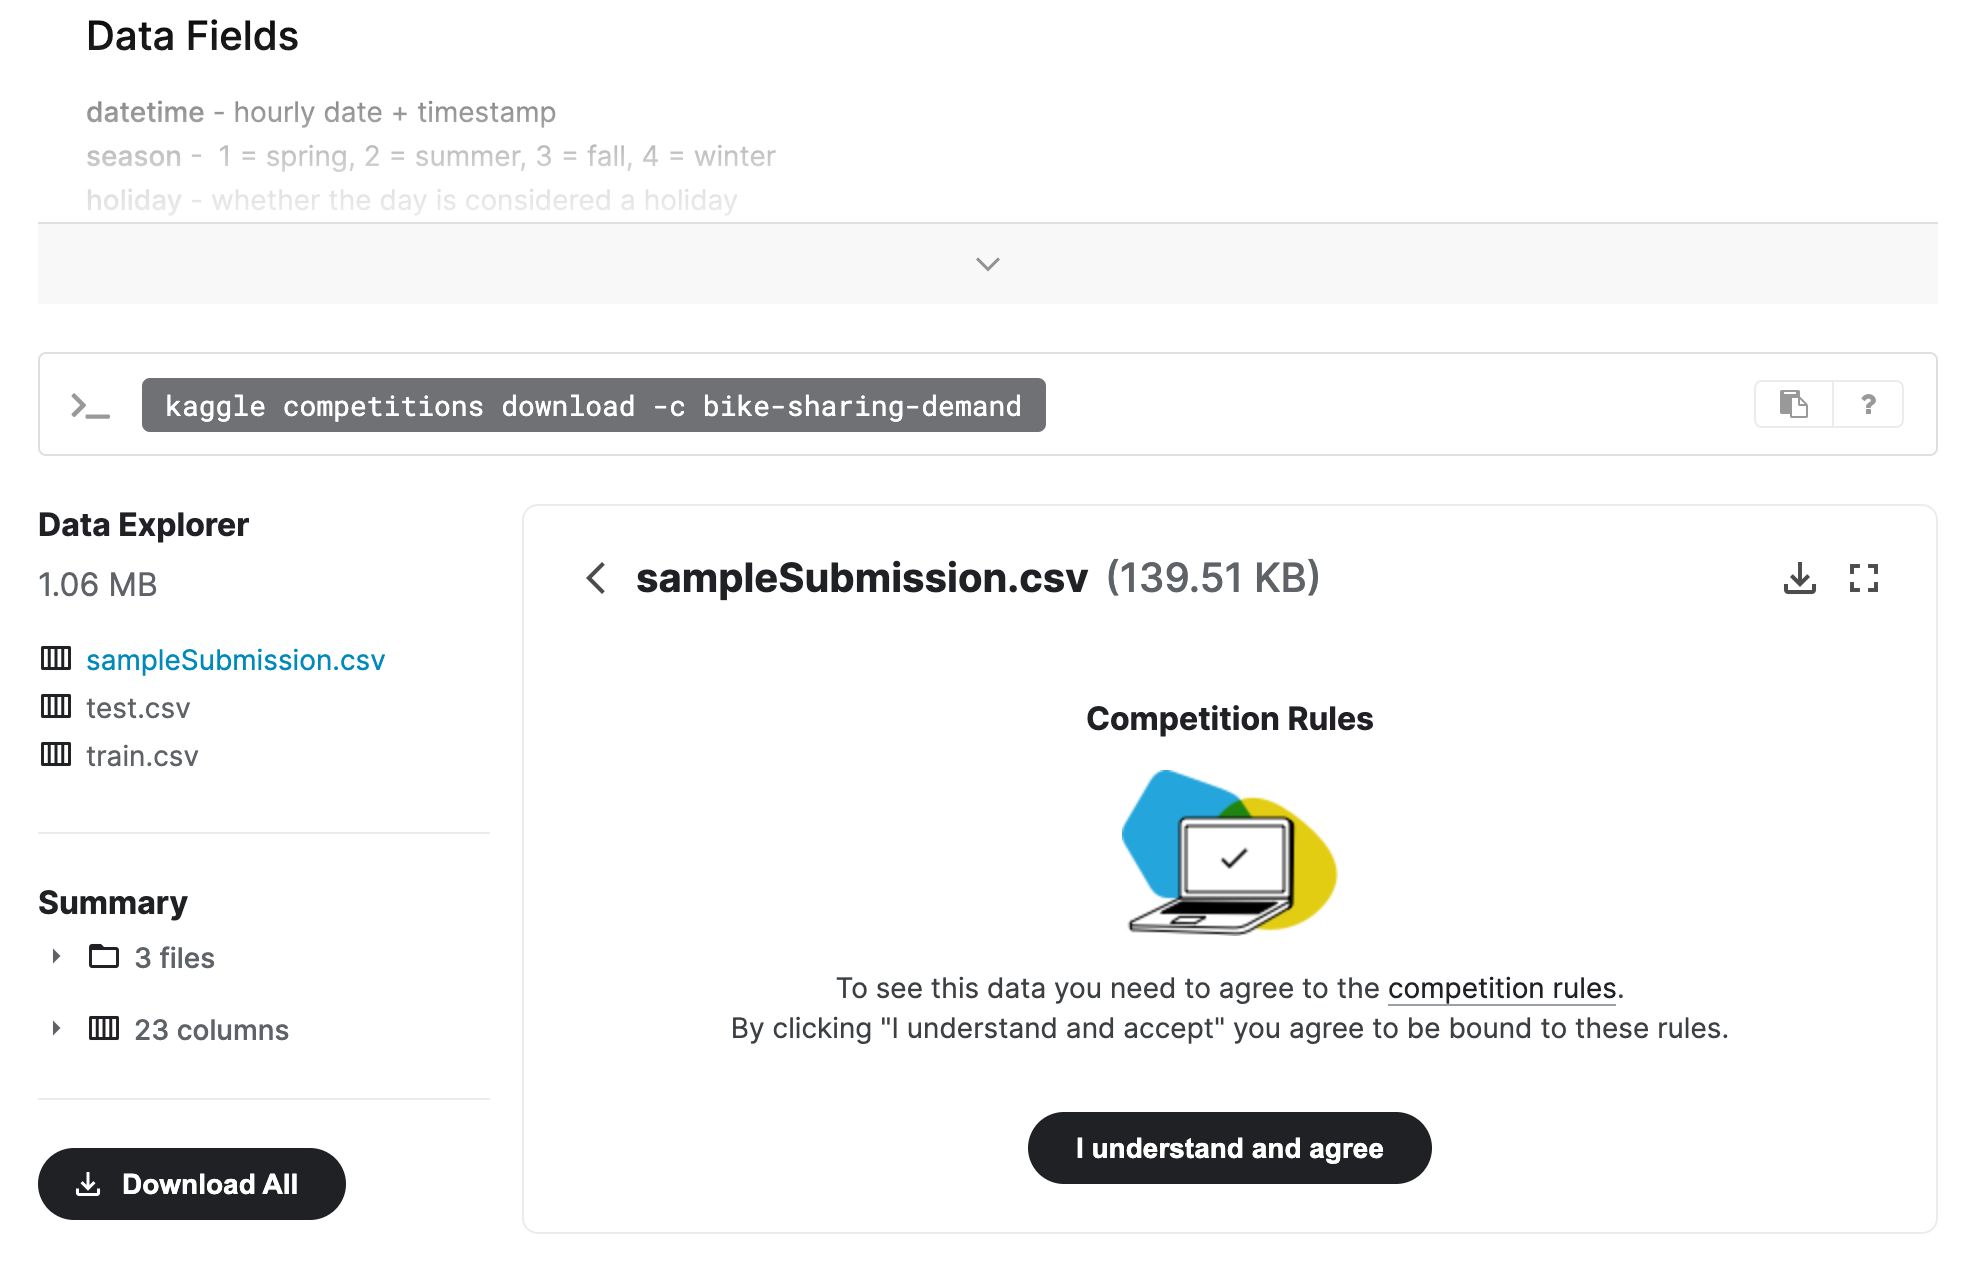

In [13]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 6.39MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train['datetime'] = pd.to_datetime(train['datetime'])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test['datetime'] = pd.to_datetime(test['datetime'])
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission['datetime'] = pd.to_datetime(submission['datetime'])
submission.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [11]:
predictor = TabularPredictor(label = 'count', eval_metric = 'root_mean_squared_error').fit(train_data = train.loc[:, ~train.columns.isin(['casual', 'registered'])], time_limit= 600, presets = 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20220328_175015/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220328_175015/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3000.36 MB
	Train Data (Original)  Memory Usage: 0.7

### Review AutoGluon's training run with ranking of models that did the best.

In [12]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.877182      11.363938  502.878878                0.000679           0.339414            3       True         15
1   RandomForestMSE_BAG_L2  -53.356572      10.469859  396.322816                0.585486          24.969305            2       True         12
2     ExtraTreesMSE_BAG_L2  -54.084402      10.440273  379.594396                0.555901           8.240885            2       True         14
3          LightGBM_BAG_L2  -55.165311      10.133517  393.131991                0.249144          21.778480            2       True         11
4          CatBoost_BAG_L2  -55.562295       9.972728  447.550794                0.088355          76.197283            2       True         13
5        LightGBMXT_BAG_L2  -60.183735      13.161048  420.644595         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446146,
  'KNeighborsDist_BAG_L1': -84.12506123181544,
  'LightGBMXT_BAG_L1': -131.46090891834507,
  'LightGBM_BAG_L1': -

### Create predictions from test dataset

In [13]:
predictions = predictor.predict(test)
predictions.head()

0    24.779957
1    41.865349
2    46.466507
3    49.037796
4    51.664707
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [14]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.935707
std        90.159790
min         3.152718
25%        21.097870
50%        63.812248
75%       169.202026
max       362.081421
Name: count, dtype: float64

In [15]:
# How many negative values do we have?
predictions.lt(0).any().any()

False

In [ ]:
# Set them to zero
?

### Set predictions to submission dataframe, save, and submit

In [16]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [17]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "second raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 261kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [18]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-03-28 18:02:35  second raw submission              complete  1.79692      1.79692       
submission_new_hpo.csv       2022-03-25 22:31:07  new features with hyperparameters  complete  0.46170      0.46170       
submission_new_features.csv  2022-03-25 22:04:45  new features2                      complete  0.71865      0.71865       
submission_new_features.csv  2022-03-25 13:56:54  new features                       complete  1.80234      1.80234       


#### Initial score of `1.79692`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [10]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35b593fa50>,
      dtype=object)

In [19]:
# create a new feature
train['month'] = train['datetime'].dt.month
test['month'] = test['datetime'].dt.month
train['day'] = train['datetime'].dt.day
test['day'] = test['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour
train['year'] = train['datetime'].dt.year
test['year'] = test['datetime'].dt.year
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  month  day  hour  year  
0        81        0.0       3          13     16      1    1     0  2011  
1        80        0.0       8          32     40      1    1     1  2011  
2        80        0.0       5          27     32      1    1     2  2011  
3        75        0.0       3          10     13      1    1     3  2011  
4        75        0.0       0           1      1      1    1     4  2011

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [20]:
train["season"] = train.season.astype('category')
train["weather"] = train.weather.astype('category')
test["season"] = test.season.astype('category')
test["weather"] = test.weather.astype('category')

In [21]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  month  day  hour  year  
0        81        0.0       3          13     16      1    1     0  2011  
1        80        0.0       8          32     40      1    1     1  2011  
2        80        0.0       5          27     32      1    1     2  2011  
3        75        0.0       3          10     13      1    1     3  2011  
4        75        0.0       0           1      1      1    1     4  2011

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f414db9b1d0>,
      dtype=object)

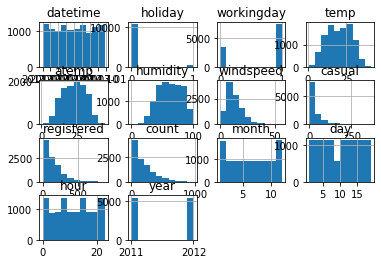

In [22]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [23]:
predictor_new_features = TabularPredictor(label = 'count', eval_metric = 'root_mean_squared_error').fit(train_data = train.loc[:, ~train.columns.isin(['casual', 'registered'])], time_limit= 700, presets = 'best_quality', num_bag_folds = 9, num_stack_levels = 4 )

No path specified. Models will be saved in: "AutogluonModels/ag-20220328_180523/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 700s
AutoGluon will save models to "AutogluonModels/ag-20220328_180523/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2196.37 MB
	Train Data (Original)  Memory Usage: 0.

In [24]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.195556      16.775703  307.398485                0.000680           0.307394            3       True         12
1          CatBoost_BAG_L2  -30.481440      15.385952  247.795676                0.135581          66.228345            2       True         11
2          LightGBM_BAG_L2  -30.562517      15.558517  208.471350                0.308146          26.904020            2       True          9
3      WeightedEnsemble_L4  -30.596629      18.666115  412.045969                0.000686           0.269897            4       True         18
4          CatBoost_BAG_L3  -30.685479      17.489195  380.115860                0.126633          45.880358            3       True         16
5          LightGBM_BAG_L3  -31.183250      17.493855  357.232922         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L3': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L3': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L3': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L3': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L4': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L4': 'StackerEnsembleModel_

In [25]:
predictions2 = predictor_new_features.predict(test)
predictions2.head()

0    17.061325
1    12.463499
2    11.089870
3     9.754826
4     8.325451
Name: count, dtype: float32

In [26]:
# Remember to set all negative values to zero
predictions2.lt(0).any().any()

False

In [27]:
submission_new_features_2 = pd.read_csv('sampleSubmission.csv')
submission_new_features_2.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

In [28]:
predictor_new_features.leaderboard()

                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.195556      16.775703  307.398485                0.000680           0.307394            3       True         12
1          CatBoost_BAG_L2  -30.481440      15.385952  247.795676                0.135581          66.228345            2       True         11
2          LightGBM_BAG_L2  -30.562517      15.558517  208.471350                0.308146          26.904020            2       True          9
3      WeightedEnsemble_L4  -30.596629      18.666115  412.045969                0.000686           0.269897            4       True         18
4          CatBoost_BAG_L3  -30.685479      17.489195  380.115860                0.126633          45.880358            3       True         16
5          LightGBM_BAG_L3  -31.183250      17.493855  357.232922                0.131293          22.997420            3       True    

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -30.195556      16.775703  307.398485   
1          CatBoost_BAG_L2  -30.481440      15.385952  247.795676   
2          LightGBM_BAG_L2  -30.562517      15.558517  208.471350   
3      WeightedEnsemble_L4  -30.596629      18.666115  412.045969   
4          CatBoost_BAG_L3  -30.685479      17.489195  380.115860   
5          LightGBM_BAG_L3  -31.183250      17.493855  357.232922   
6      WeightedEnsemble_L5  -31.212964      19.916028  544.415882   
7     ExtraTreesMSE_BAG_L3  -31.262452      17.943030  342.041930   
8          CatBoost_BAG_L4  -31.351426      19.179080  496.709384   
9        LightGBMXT_BAG_L2  -31.354845      16.331295  213.958727   
10  RandomForestMSE_BAG_L3  -31.557654      17.958329  358.089285   
11         LightGBM_BAG_L4  -31.690624      19.181201  479.582848   
12     WeightedEnsemble_L6  -31.861500      21.014571  634.345104   
13       LightGBMXT_BAG_L3  -31.928007      17.607252  357.402178   
14  RandomForestMSE_BAG_L2  -31.974695      15.837910  208.711740   
15  RandomForestMSE_BAG_L4  -32.004439      19.637742  483.583689   
16     WeightedEnsemble_L2  -32.102749      15.051522  161.826509   
17         LightGBM_BAG_L5  -32.108915      20.232077  588.162925   
18  RandomForestMSE_BAG_L5  -32.418350      20.706704  590.013435   
19       LightGBMXT_BAG_L4  -32.573989      19.248375  480.418374   
20       LightGBMXT_BAG_L5  -33.085096      20.319431  588.887087   
21         LightGBM_BAG_L1  -33.732449       3.229472   48.680667   
22       LightGBMXT_BAG_L1  -34.101304      11.181413   99.758981   
23  RandomForestMSE_BAG_L1  -38.431140       0.535739   12.915936   
24         CatBoost_BAG_L1  -54.189193       0.096272   20.134478   
25   KNeighborsDist_BAG_L1  -84.125061       0.104101    0.033620   
26   KNeighborsUnif_BAG_L1 -101.546199       0.103373    0.043648   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000680           0.307394            3       True   
1                 0.135581          66.228345            2       True   
2                 0.308146          26.904020            2       True   
3                 0.000686           0.269897            4       True   
4                 0.126633          45.880358            3       True   
5                 0.131293          22.997420            3       True   
6                 0.000829           0.420297            5       True   
7                 0.580467           7.806428            3       True   
8                 0.137668          38.769216            4       True   
9                 1.080924          32.391396            2       True   
10                0.595767          23.853784            3       True   
11                0.139789          21.642679            4       True   
12                0.000686           0.229237            6       True   
13                0.244690          23.166677            3       True   
14                0.587540          27.144410            2       True   
15                0.596330          25.643521            4       True   
16                0.000796           0.437305            2       True   
17                0.109914          21.689135            5       True   
18                0.584541          23.539646            5       True   
19                0.206964          22.478205            4       True   
20                0.197268          22.413297            5       True   
21                3.229472          48.680667            1       True   
22               11.181413          99.758981            1       True   
23                0.535739          12.915936            1       True   
24                0.096272          20.134478            1       True   
25                0.104101           0.033620            1       True   
26                0.103373           0.043648            1       True   

    fit_order  
0          12  
1          

In [29]:
# Same submitting predictions
submission_new_features_2["count"] = predictions2
submission_new_features_2.to_csv("submission_new_features.csv", index=False)

In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features2"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 314kB/s]
Successfully submitted to Bike Sharing Demand

In [31]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-03-28 18:20:40  new features2                      complete  0.67703      0.67703       
submission.csv               2022-03-28 18:02:35  second raw submission              complete  1.79692      1.79692       
submission_new_hpo.csv       2022-03-25 22:31:07  new features with hyperparameters  complete  0.46170      0.46170       
submission_new_features.csv  2022-03-25 22:04:45  new features2                      complete  0.71865      0.71865       


#### New Score of `1.80234`
#### New Score of `0.71865`
#### New Score of `0.67703`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [25]:
import autogluon.core as ag

nn_options = {  # specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  # number of training epochs (controls training time of NN models)
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  # learning rate used in training (real-valued hyperparameter searched on log-scale)
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  # activation function used in NN (categorical hyperparameter, default = first entry)
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  # dropout probability (real-valued hyperparameter)
}

gbm_options = {  # specifies non-default hyperparameter values for lightGBM gradient boosted trees
    'num_boost_round': 100,  # number of boosting rounds (controls training time of GBM models)
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  # number of leaves in trees (integer hyperparameter)
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options,  # NOTE: comment this line out if you get errors on Mac OSX
                  }  # When these keys are missing from hyperparameters dict, no models of that type are trained

time_limit = 2*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [27]:
predictor_new_hpo = TabularPredictor(label = 'count', eval_metric = 'root_mean_squared_error').fit(
    train_data = train.loc[:, ~train.columns.isin(['casual', 'registered'])], time_limit= 600, 
    presets = 'best_quality', hyperparameters = hyperparameters, hyperparameter_tune_kwargs = hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20220325_222026/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220325_222026/"
AutoGluon Version:  0.4.0
Python Version:     3.7.10
Operating System:   Linux
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2226.26 MB
	Train Data (Original)  Memory Usage: 0.

Fitted model: LightGBM_BAG_L1/T1 ...
	-39.5016	 = Validation score   (root_mean_squared_error)
	0.49s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-37.0368	 = Validation score   (root_mean_squared_error)
	0.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-37.0848	 = Validation score   (root_mean_squared_error)
	0.41s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T4 ...
	-119.9241	 = Validation score   (root_mean_squared_error)
	0.31s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T5 ...
	-42.1781	 = Validation score   (root_mean_squared_error)
	0.35s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 22.49s of the 596.62s of remaining time.


	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L1/T1 ...
	-98.4782	 = Validation score   (root_mean_squared_error)
	4.41s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/T2 ...
	-56.1242	 = Validation score   (root_mean_squared_error)
	6.98s	 = Training   runtime
	0.02s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L1/T3 ...
	-83.5979	 = Validation score   (root_mean_squared_error)
	6.19s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T1 ... Training model for up to 377.82s of the 577.85s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-40.2554	 = Validation score   (root_mean_squared_error)
	13.98s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: LightGBM_BAG_L1/T2 ... Training model for up to 361.31s of the 561.33s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldF

Fitted model: LightGBM_BAG_L2/T1 ...
	-39.7935	 = Validation score   (root_mean_squared_error)
	0.5s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-39.9779	 = Validation score   (root_mean_squared_error)
	0.44s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-39.9828	 = Validation score   (root_mean_squared_error)
	0.57s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T4 ...
	-102.3847	 = Validation score   (root_mean_squared_error)
	0.44s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T5 ...
	-40.152	 = Validation score   (root_mean_squared_error)
	0.5s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 19.32s of the 339.69s of remaining time.


	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L2/T1 ...
	-40.7223	 = Validation score   (root_mean_squared_error)
	4.23s	 = Training   runtime
	0.04s	 = Validation runtime
Fitted model: NeuralNetTorch_BAG_L2/T2 ...
	-41.072	 = Validation score   (root_mean_squared_error)
	6.8s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T1 ... Training model for up to 327.82s of the 327.79s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-36.7436	 = Validation score   (root_mean_squared_error)
	14.67s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T2 ... Training model for up to 310.83s of the 310.8s of remaining time.
	Fitting 7 child models (S1F2 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	-36.3229	 = Validation score   (root_mean_squared_error)
	15.01s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L2

In [28]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L3  -36.036828       3.068776  357.723527                0.000999           0.542923            3       True         17
1         LightGBM_BAG_L2/T2  -36.322940       2.030506  241.210043                0.134195          15.012985            2       True         11
2         LightGBM_BAG_L2/T3  -36.555973       2.043340  241.752166                0.147030          15.555108            2       True         12
3         LightGBM_BAG_L2/T1  -36.743649       2.047431  240.862163                0.151120          14.665106            2       True         10
4         LightGBM_BAG_L2/T5  -37.233509       2.020862  240.970714                0.124551          14.773657            2       True         14
5   NeuralNetTorch_BAG_L2/T1  -37.583204       2.392515  265.8

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/T2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L1/T3': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'NeuralNetTorch_BAG_L2/T2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedE

In [29]:
# Remember to set all negative values to zero
predictions3 = predictor_new_hpo.predict(test)
predictions3.head()


0    9.958723
1    5.598632
2    5.368958
3    5.142498
4    5.142470
Name: count, dtype: float32

In [31]:
predictions2.lt(0).any().any()

False

In [32]:
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

In [33]:
# Same submitting predictions
submission_new_hpo["count"] = predictions3
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 281kB/s]
Successfully submitted to Bike Sharing Demand

In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-03-25 22:31:07  new features with hyperparameters  complete  0.46170      0.46170       
submission_new_features.csv  2022-03-25 22:04:45  new features2                      complete  0.71865      0.71865       
submission_new_features.csv  2022-03-25 13:56:54  new features                       complete  1.80234      1.80234       
submission.csv               2022-03-24 14:34:40  first raw submission               complete  1.79657      1.79657       


#### New Score of `0.46170`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

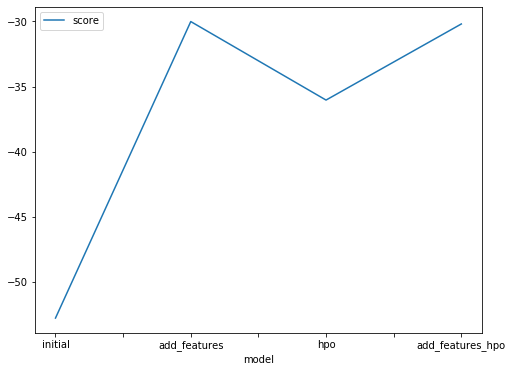

In [32]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo", "add_features_hpo"],
        "score": [-52.771905, -30.010359, -36.036828, -30.195556]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

In [33]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo", "add_features_hpo"],
        "score": [1.79657, 0.71865, 0.46170, 0.67703]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [35]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo", "add_features_hpo"],
    "time": [600, 600, 600, 700],
    "num_bag_folds": [8, 8, 8, 9],
    "num_stack_levels": [3, 3, 3, 4],
    "score": [1.79657, 0.71865, 0.46170, 0.67703]
})

model  time  num_bag_folds  num_stack_levels    score
0           initial   600              8                 3  1.79657
1      add_features   600              8                 3  0.71865
2               hpo   600              8                 3  0.46170
3  add_features_hpo   700              9                 4  0.67703